In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_dataset.csv")

# **Basic EDA**

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,0
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,1
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0


In [4]:
df.shape

(2293, 10)

In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153,0.390318
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480,0.487928
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000,0.000000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753,0.000000
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138,0.000000
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661,1.000000
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

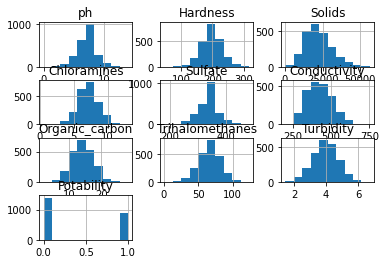

In [6]:
df.hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2293 non-null   float64
 1   Hardness         2293 non-null   float64
 2   Solids           2293 non-null   float64
 3   Chloramines      2293 non-null   float64
 4   Sulfate          2293 non-null   float64
 5   Conductivity     2293 non-null   float64
 6   Organic_carbon   2293 non-null   float64
 7   Trihalomethanes  2293 non-null   float64
 8   Turbidity        2293 non-null   float64
 9   Potability       2293 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 179.3 KB


In [8]:
# Input/independent variables
X = df.drop('Potability', axis = 1)   # here we are dropping the Target feature as this is the target and 'X' is input features, the changes are not 
y = df['Potability']             # Output/Dependent variable

In [9]:
X.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,7.082265,196.390335,22074.335334,7.132987,333.393347,425.455702,14.229174,66.499518,3.967153
std,1.486029,32.460633,8668.693908,1.573879,36.116271,80.266652,3.341429,16.067742,0.788480
min,0.000000,47.432000,320.942611,0.530351,180.206746,201.619737,2.200000,0.738000,1.450000
25%,6.262799,176.753500,15825.182571,6.140033,316.552791,363.974060,12.015868,56.329076,3.440753
50%,7.080795,196.833001,21153.322827,7.135063,333.775777,420.828362,14.151538,66.396293,3.947138
75%,7.873272,216.441172,27345.174288,8.104498,349.985243,480.715208,16.450990,77.182622,4.503661
max,14.000000,317.338124,56351.396304,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000


In [10]:
y.describe()

count    2293.000000
mean        0.390318
std         0.487928
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Potability, dtype: float64

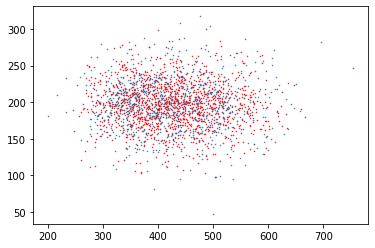

In [11]:
plt.plot(df.loc[y== 0, 'Conductivity'].to_list(),df.loc[y== 0, 'Hardness'].to_list(),'.',color='r',markersize=1)
plt.plot(df.loc[y== 1, 'Conductivity'].to_list(),df.loc[y== 1, 'Hardness'].to_list(),'.',markersize=1)

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2, random_state=1)

In [13]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest =sc.transform(xtest)

In [14]:
print(np.shape(xtrain),np.shape(xtest))

(1834, 9) (459, 9)


# Fitting the model

In [15]:
classifier=DecisionTreeClassifier()
classifier.fit(xtrain,ytrain)
ypredicted=classifier.predict(xtest)
from sklearn.metrics import * 
print(accuracy_score(ypredicted,ytest))

0.5947712418300654


In [16]:
from sklearn.svm import SVC
SVCClf = SVC(kernel = 'rbf',gamma = 'scale', shrinking = False,)
SVCClf.fit(xtrain, ytrain)
ypredicted= SVCClf.predict(xtest)
accuracy_score(ypredicted,ytest)

0.7124183006535948

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0).fit(xtrain, ytrain)
ypredicted=logreg.predict(xtest)
accuracy_score(ypredicted,ytest)

0.6122004357298475

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=23)
neigh.fit(xtrain, ytrain)
ypredicted= neigh.predict(xtest)
accuracy_score(ypredicted,ytest)

0.6797385620915033

In [ ]:
from sklearn.model_selection import GridSearchCV
 
param_grid = {'C': np.arange(0.5,1.5,0.01),
              'gamma': ['scale'],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True);
 
# fitting the model for grid search
grid.fit(xtrain, ytrain);
accuracy_score(grid.predict(xtest),ytest)
#print(classification_report(ytest,grid.predict(xtest)))

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
acc=[]
'''
for i in range(1,100):
    clf = RandomForestClassifier(max_depth=i, random_state=1)
    clf.fit(xtrain, ytrain)
    acc.append(accuracy_score(clf.predict(xtest),ytest))
'''


'\nfor i in range(1,100):\n    clf = RandomForestClassifier(max_depth=i, random_state=1)\n    clf.fit(xtrain, ytrain)\n    acc.append(accuracy_score(clf.predict(xtest),ytest))\n'

In [22]:
clf = RandomForestClassifier(max_depth=18, random_state=1)
clf.fit(xtrain, ytrain)
print(classification_report(clf.predict(xtest),ytest))
accuracy_score(clf.predict(xtest),ytest)

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       361
           1       0.41      0.76      0.53        98

    accuracy                           0.72       459
   macro avg       0.66      0.73      0.67       459
weighted avg       0.81      0.72      0.74       459



0.7189542483660131

In [41]:
test=pd.read_csv("test_dataset.csv")
test.head()



[1 0 0 ... 0 1 1]
